---
layout: default
title: Visualisation and statistics
---

<div style="color: #2F5496; text-decoration: underline; font-size: 18px; font-weight: bold;">
    Import libraries
</div>

In [1]:
# Dataframe libraries
import pandas as pd
import geopandas as gpd

# Visualisation libraries
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import matplotlib.patches as mpatches
from IPython.display import HTML

# Other required libraries
%matplotlib inline
import numpy as np
from scipy.stats import probplot
import scipy.stats as stats

<div style="color: #2F5496; text-decoration: underline; font-size: 18px; font-weight: bold;">
    Import data
</div>

In [2]:
Bradford_polygon = gpd.read_file('Data/Wrangled dataframes/Bradford_polygon.geojson')

# Visual check
Bradford_polygon.head()

,City,geometry
0,Bradford,"POLYGON ((404750.688 432366.281, 404708.240 43..."


In [3]:
Bradford_greenspace_site_unique = gpd.read_file('Data/Wrangled dataframes/Bradford_greenspace_site_unique.geojson')

# Visual check
Bradford_greenspace_site_unique.head()

,Greenspace_ID,Type,geometry
0,0295ED18-D538-5C37-E063-AAEFA00A445E,Playing Field,"POLYGON Z ((414018.070 438415.690 0.000, 41399..."
1,0295ED18-E5D4-5C37-E063-AAEFA00A445E,Playing Field,"POLYGON Z ((415193.700 439129.550 0.000, 41519..."
2,0295ED18-F2F3-5C37-E063-AAEFA00A445E,Playing Field,"POLYGON Z ((415690.440 439919.060 0.000, 41568..."
3,0295ECC9-0C25-5C37-E063-AAEFA00A445E,Play Space,"POLYGON Z ((416739.570 439592.210 0.000, 41675..."
4,0295ECC7-FBFC-5C37-E063-AAEFA00A445E,Play Space,"POLYGON Z ((415991.960 438808.610 0.000, 41598..."


In [4]:
Bradford_OA_polygons = gpd.read_file('Data/Wrangled dataframes/Bradford_OA_polygons.geojson')

# Visual check
Bradford_OA_polygons.head()

,OA21CD,City,geometry
0,E00053353,Bradford,"POLYGON ((415817.093 440872.597, 415821.094 44..."
1,E00053354,Bradford,"POLYGON ((415078.000 439967.001, 415058.323 43..."
2,E00053355,Bradford,"POLYGON ((416252.367 439816.041, 416253.270 43..."
3,E00053356,Bradford,"POLYGON ((416668.000 439392.028, 416667.653 43..."
4,E00053357,Bradford,"POLYGON ((415143.909 439176.235, 415143.000 43..."


In [5]:
Bradford_OA_PWC = gpd.read_file('Data/Wrangled dataframes/Bradford_OA_PWC.geojson')

# Visual check
Bradford_OA_PWC.head()

,OA21CD,geometry
0,E00053353,POINT (413638.052 439495.615)
1,E00053354,POINT (414837.013 439813.246)
2,E00053355,POINT (416162.559 439674.009)
3,E00053356,POINT (416591.137 439417.227)
4,E00053357,POINT (414671.681 439110.823)


In [6]:
Ind_vars = pd.read_csv('Data/Wrangled dataframes/Ind_vars.csv')

# Visual check
Ind_vars.head()

,Output Areas Code,HHD_dep_education_PC,HHD_dep_employment_PC,HHD_dep_health_PC,HHD_dep_housing_PC
0,E00053353,0.282787,0.114754,0.336066,0.077869
1,E00053354,0.172932,0.067669,0.308271,0.052632
2,E00053355,0.112000,0.048780,0.219512,0.016000
3,E00053356,0.215278,0.041667,0.340278,0.048611
4,E00053357,0.141844,0.034965,0.212766,0.007092


In [7]:
unique_nearest_greenspace = pd.read_csv('Data/Wrangled dataframes/unique_nearest_greenspace.csv')

# Visual check
unique_nearest_greenspace.head()

,OA21CD,Greenspace_ID,Type,Distance
0,E00053353,0295ED18-D538-5C37-E063-AAEFA00A445E,Playing Field,1000.455806
1,E00053354,0295ED18-E5D4-5C37-E063-AAEFA00A445E,Playing Field,771.145845
2,E00053355,0295ED18-F2F3-5C37-E063-AAEFA00A445E,Playing Field,418.265674
3,E00053356,0295ECC9-0C25-5C37-E063-AAEFA00A445E,Play Space,194.292561
4,E00053357,0295ED18-E5D4-5C37-E063-AAEFA00A445E,Playing Field,432.352481


In [8]:
final_df = gpd.read_file('Data/Wrangled dataframes/final_df.geojson')

# Visual check
final_df.head()

,OA21CD,Distance,HHD_dep_education_PC,HHD_dep_employment_PC,HHD_dep_health_PC,HHD_dep_housing_PC,geometry
0,E00053353,1000.455806,0.282787,0.114754,0.336066,0.077869,"POLYGON ((415817.093 440872.597, 415821.094 44..."
1,E00053354,771.145845,0.172932,0.067669,0.308271,0.052632,"POLYGON ((415078.000 439967.001, 415058.323 43..."
2,E00053355,418.265674,0.112000,0.048780,0.219512,0.016000,"POLYGON ((416252.367 439816.041, 416253.270 43..."
3,E00053356,194.292561,0.215278,0.041667,0.340278,0.048611,"POLYGON ((416668.000 439392.028, 416667.653 43..."
4,E00053357,432.352481,0.141844,0.034965,0.212766,0.007092,"POLYGON ((415143.909 439176.235, 415143.000 43..."


<div style="color: #2F5496; text-decoration: underline; font-size: 18px; font-weight: bold;">
    OAs
</div>

Maps shows OA boundaries and PWCs within Bradford LAD. PWCs locations can vary from near the edge to the centre of OAs.

In [59]:
m = Bradford_OA_polygons.explore(   # assign the map object
    tooltip=False,  # turn off tooltip for this layer
    style_kwds=dict(fillColor='#Grey', fillOpacity=0.1, weight=0.25, color='black'), # grey fill; black outline around polygons
    highlight=False,     # turn off highlight functionality for this layer
    tiles="CartoDB positron",     # base map    
    name = 'Bradford_OA_polygons',     # name of layer
)

Bradford_OA_PWC.explore(
    m=m,     # pass the map object
    tooltip=False,  # turn off tooltip for this layer
    marker_type='circle',     # show circles for points
    marker_kwds=dict(radius=1, color='#134f5c', fillOpacity=1),  # make circles small and fill dark blue
    highlight=False,     # turn off highlight functionality for this layer
    name = 'Bradford_OA_PWC',     # name of layer
)

# Save as HTML file
html_file_name = 'Interactive maps/OA_boundaries_and_PWCs.html'
m.save(html_file_name)

In [60]:
html_content = """
<iframe src="Interactive maps/OA_boundaries_and_PWCs.html" width="100%" height="750"></iframe>
"""
HTML(html_content)

<div style="color: #2F5496; text-decoration: underline; font-size: 18px; font-weight: bold;">
    Greenspace
</div>

Map shows greenspace by type. However, as detailed in the data wrangling notebook, duplicates were removed by keeping first instances of duplicated cases hence counts in the pie chart are skewed. In most instances, 'playing field' was retained, and so counts are higher for this type. This does not impact subsequent analysis as type does not feature in the regression modelling.

In [61]:
m = Bradford_polygon.explore(   # assign the map object
    tooltip=False,  # turn off tooltip for this layer
    style_kwds=dict(fillColor='Grey', fillOpacity=0.1, weight=0.25, color='black'),  # grey fill; black outline around polygons
    highlight=False,     # turn off highlight functionality for this layer
    tiles="CartoDB positron",     # base map    
    name = 'Bradford_polygon',     # name of layer
)

Bradford_greenspace_site_unique.explore(
    m=m,     # pass the map object
    column='Type',  # assign colour to each type of greenspace to be visible on the map
    tooltip=['Type'],  # show type of greenspace in tooltip (on hover)
    cmap="viridis",  # use "Viridis" matplotlib colormap
    style_kwds=dict(weight=0.25, color='black', fillOpacity=0.75),  # use thin, black outline around each greenspace
    highlight_kwds=dict(fillOpacity=1),     # highlight greenspace on hover with full opacity of colour
    legend=True,     # include legend for greenspace type
    name = 'Greenspace',     # name of layer
)

# Save as HTML file
html_file_name = 'Interactive maps/Greenspace.html'
m.save(html_file_name)

In [62]:
html_content = """
<iframe src="Interactive maps/Greenspace.html" width="100%" height="750"></iframe>
"""
HTML(html_content)

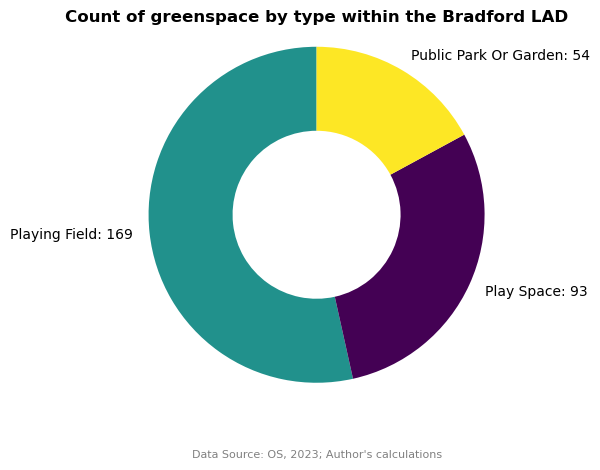

In [11]:
greenspace_types = Bradford_greenspace_site_unique['Type'].unique().tolist()     # Get list of greenspace types
greenspace_counts = list(Bradford_greenspace_site_unique['Type'].value_counts()) # Get list of greenspace type counts

colours = ['#21918c', '#440154', '#fde725']     # Set colours from the map for visual consistency

# Create a pie chart
fig, ax = plt.subplots()
wedges, labels = ax.pie(greenspace_counts, labels=greenspace_types,     # counts as data, types as labels
                        autopct=None, startangle=90,                    # turn off data labels, set start angle to 90degrees
                        wedgeprops=dict(width=0.5), colors=colours)     # set size of donut hole, set colour scheme

# Add labels within each pie piece
for label, value in zip(labels, greenspace_counts):
    label.set(size=10, text=f'{label.get_text()}: {value}')     # Set the labels to be "Type: Count"


# Equal aspect ratio to make sure the chart is drawn as a circle
ax.axis('equal')  

# Add a title
plt.title('Count of greenspace by type within the Bradford LAD',
          fontweight='bold', fontsize=12, fontfamily='sans-serif') # Change title to specified font settings

# Add a footnote with the data source and specify location on visual
plt.text(0.5, -0.15, "Data Source: OS, 2023; Author's calculations",
         ha="center", va="center", transform=plt.gca().transAxes,
         fontsize=8, color="gray")

# Display the pie chart
plt.show()

<div style="color: #2F5496; text-decoration: underline; font-size: 18px; font-weight: bold;">
    Deprivation
</div>

In [50]:
# Function takes a string argument that is the name of the independent variable to be mapped

def create_deprivation_choropleth(variable):
    # Create a copy of final_df so data and column names can be made visual-appropriate
    OA_choropleth = final_df.copy()
    
    # Multiply data by 100 to create percentage in readable format for the choropleth
    OA_choropleth[['HHD_dep_education_PC', 'HHD_dep_employment_PC', 
                   'HHD_dep_health_PC', 'HHD_dep_housing_PC']] = (
        OA_choropleth[['HHD_dep_education_PC', 'HHD_dep_employment_PC', 
                       'HHD_dep_health_PC', 'HHD_dep_housing_PC']] * 100).round(1)
    
    # Create a dictionary of current independent variable column names with long-form for use on map
    columns_dict = {"HHD_dep_education_PC": "Households deprived in the education dimension (%)",
                    "HHD_dep_employment_PC": "Households deprived in the employment dimension (%)",
                    "HHD_dep_health_PC": "Households deprived in the health dimension (%)",
                    "HHD_dep_housing_PC": "Households deprived in the housing dimension (%)"}
    
    # Rename the columns to the long-form version
    renamed_columns = OA_choropleth.rename(columns=columns_dict, inplace=True)
    
    # Write long-form column name to a new variable to use in the choropleth code
    variable_longform = columns_dict[variable]

    choropleth = OA_choropleth.explore(
        column=variable_longform,  # make choropleth based on the chosen variable column
        scheme='EqualInterval',     # use mapclassify equal interval for binning
        tooltip=["OA21CD",variable_longform],  # show chosen variable value in tooltip (on hover)
        k=5,  # use 5 bins
        tiles="CartoDB positron",  # use "CartoDB positron" basemap
        cmap="YlGnBu",  # use "YellowGreenBlue" matplotlib colormap
        style_kwds=dict(weight=0.25, color='black', fillOpacity=0.75),  # use thin, black outline around each OA
        highlight_kwds=dict(fillOpacity=1),     # highlight OA on hover with full opacity of colour
        legend_kwds=dict(caption=variable_longform))   # Use long-form column name on the legend
    
    # Save the choropleth as HTML file using the variable inputted to the function
    html_file_name = 'Interactive maps/' + variable + '.html'
    choropleth.save(html_file_name)
    
    return html_file_name

Map shows areas of high education deprivation in the southeast and west. Lowest levels are in rural, affluent areas in the southwest and north.

In [51]:
create_deprivation_choropleth('HHD_dep_education_PC')

'Interactive maps/HHD_dep_education_PC.html'

In [52]:
html_content = """
<iframe src="Interactive maps/HHD_dep_education_PC.html" width="100%" height="750"></iframe>
"""
HTML(html_content)

Map shows similar spatial employment deprivation patterns to education. The range of employment deprivation is smaller though, from 0% to 54.7%.

In [53]:
create_deprivation_choropleth('HHD_dep_employment_PC')

'Interactive maps/HHD_dep_employment_PC.html'

In [54]:
html_content = """
<iframe src="Interactive maps/HHD_dep_employment_PC.html" width="100%" height="750"></iframe>
"""
HTML(html_content)

Map shows health deprivation levels are higher and widely spread. As health deprivation includes poor health and disability, levels may be higher due to factors including elderly populations, as well as affluence-associated poor health.

In [55]:
create_deprivation_choropleth('HHD_dep_health_PC')

'Interactive maps/HHD_dep_health_PC.html'

In [56]:
html_content = """
<iframe src="Interactive maps/HHD_dep_health_PC.html" width="100%" height="750"></iframe>
"""
HTML(html_content)

Contrastingly, map shows housing deprivation is largely isolated to Bradford city and around Keighley. Most OAs have less than 10% housing deprivation.

In [57]:
create_deprivation_choropleth('HHD_dep_housing_PC')

'Interactive maps/HHD_dep_housing_PC.html'

In [58]:
html_content = """
<iframe src="Interactive maps/HHD_dep_housing_PC.html" width="100%" height="750"></iframe>
"""
HTML(html_content)

The following charts provide key summary statistics. Education deprivation has the largest range, from 2.2% in the least deprived OA to 67.8% in the most deprived. Only education and health dimensions exceed 0% in all OAs. For health, the lowest level of deprivation is 8.8% highlighting how even the most affluent areas are impacted by this.

Education, health, and housing have outliers at the higher end, recording maximum values around 65-68%. However, average deprivation levels vary across each dimension, with housing having the lowest average (11.0%) and health the highest (35.4%). There is no consistent distribution or spatial pattern to deprivation across all four dimensions.

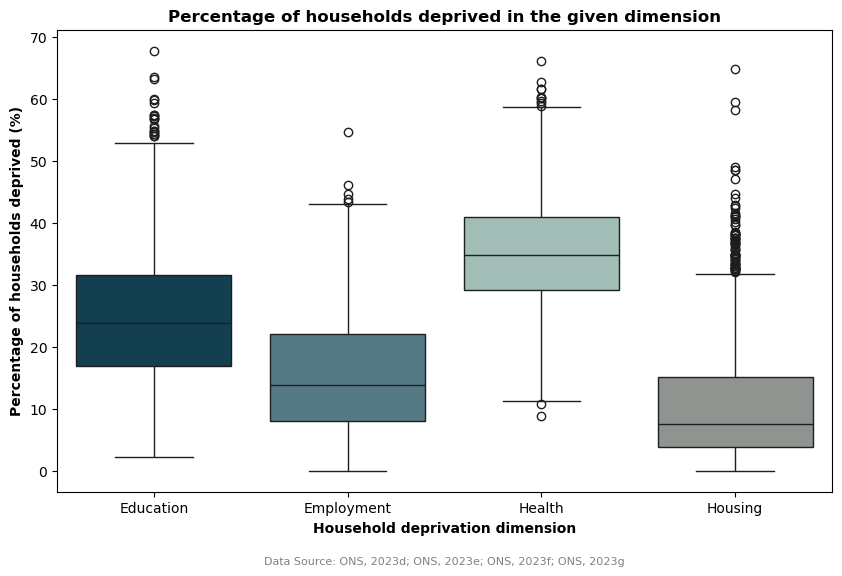

In [17]:
# Create a copy of the Ind_vars dataframe for the purposes of this boxplot
Ind_vars_boxplot = Ind_vars

# Multiply data by 100 to create percentage in readable format
Ind_vars_boxplot[['HHD_dep_education_PC', 'HHD_dep_employment_PC', 
                  'HHD_dep_health_PC', 'HHD_dep_housing_PC']] = (
    Ind_vars_boxplot[['HHD_dep_education_PC', 'HHD_dep_employment_PC', 
                      'HHD_dep_health_PC', 'HHD_dep_housing_PC']] * 100).round(1)

# Rename the columns for the chart to be clearer
Ind_vars_boxplot = Ind_vars_boxplot.rename(columns={
    "HHD_dep_education_PC": "Education",
    "HHD_dep_employment_PC": "Employment",
    "HHD_dep_health_PC": "Health",
    "HHD_dep_housing_PC": "Housing"})

# Setup figure and boxplot
fig, ax = plt.subplots(figsize=(10, 6))
wandering_forest_palette = ['#09435a', '#4e7d8e', '#9cc2b8', '#90958f']   # Create colour palette
sns.set_palette(wandering_forest_palette)     # Set colour palette
sns.boxplot(data=Ind_vars_boxplot)     # Add data

# Add title and amend axes
plt.title('Percentage of households deprived in the given dimension',
          fontweight='bold', fontsize=12) # Change title to specified font settings
plt.xlabel("Household deprivation dimension", fontweight='bold') # set x-axis label and font
plt.ylabel("Percentage of households deprived (%)", fontweight='bold') # set y-axis label and font

# Add a footnote with the data source and specify location on visual
plt.text(0.5, -0.15, "Data Source: ONS, 2023d; ONS, 2023e; ONS, 2023f; ONS, 2023g",
         ha="center", va="center", transform=plt.gca().transAxes,
         fontsize=8, color="gray")

plt.show()

In [18]:
# Get precise figures as shown in the boxplot
Ind_vars_boxplot.describe()

,Education,Employment,Health,Housing
count,1575.000000,1575.000000,1575.000000,1575.000000
mean,24.954095,15.573143,35.444508,10.959619
std,10.980256,9.313979,8.980795,9.729166
min,2.200000,0.000000,8.800000,0.000000
25%,16.900000,8.000000,29.100000,3.900000
50%,23.900000,13.800000,34.800000,7.600000
75%,31.600000,22.000000,41.000000,15.150000
max,67.800000,54.700000,66.100000,64.800000


<div style="color: #2F5496; text-decoration: underline; font-size: 18px; font-weight: bold;">
    Distance to nearest greenspace
</div>

Map shows distances to greenspace are greater in rural areas to the north and west. These areas are more affluent, with lower levels of deprivation (see maps above). More deprived OAs have lower distances.

In [68]:
def create_distance_choropleth():
    # Create a copy of final_df so data and column names can be made visual-appropriate
    OA_dist_choropleth = final_df.copy()
    
    # Round distance to the nearest metre
    OA_dist_choropleth['Distance'] = OA_dist_choropleth['Distance'].round().astype(int)
    
    # Create a dictionary of current distance column name with long-form for use on map
    distance_dict = {"Distance": "Distance to nearest greenspace (metres)"}
    
    # Rename the column to the long-form version
    rename_column = OA_dist_choropleth.rename(columns=distance_dict, inplace=True)
    
    # Write long-form column name to a new variable to use in the choropleth code
    distance_longform = 'Distance to nearest greenspace (metres)'

    dist_choropleth = OA_dist_choropleth.explore(
        column=distance_longform,  # make choropleth based on the distance column
        scheme='NaturalBreaks',     # use mapclassify natural breaks for binning
        tooltip=["OA21CD",distance_longform],  # show distance in tooltip (on hover)
        OMP_NUM_THREADS=7,  # assign number of recommended threads to prevent memory leakage
        tiles="CartoDB positron",  # use "CartoDB positron" basemap
        cmap="YlGnBu",  # use "YellowGreenBlue" matplotlib colormap
        style_kwds=dict(weight=0.25, color='black', fillOpacity=0.75),  # use thin, black outline around each OA
        highlight_kwds=dict(fillOpacity=1)     # highlight OA on hover with full opacity of colour
    )

    # Save as HTML file
    html_file_name = 'Interactive maps/Distance_to_nearest_greenspace.html'
    dist_choropleth.save(html_file_name)
    
    return html_file_name

In [69]:
create_distance_choropleth()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


'Interactive maps/Distance_to_nearest_greenspace.html'

In [70]:
html_content = """
<iframe src="Interactive maps/Distance_to_nearest_greenspace.html" width="100%" height="750"></iframe>
"""
HTML(html_content)

Boxplot shows outliers at larger distances, confirming the distance variable is right skewed. Meanwhile, descriptive statistics shows the range, from 0m to over 2,000m. OAs with 0m distance are a result of PWCs falling within greenspace boundaries. On average, greenspace is around 275m from PWCs, which is below the previous UK government target of 300m (Houlden et al, 2019).

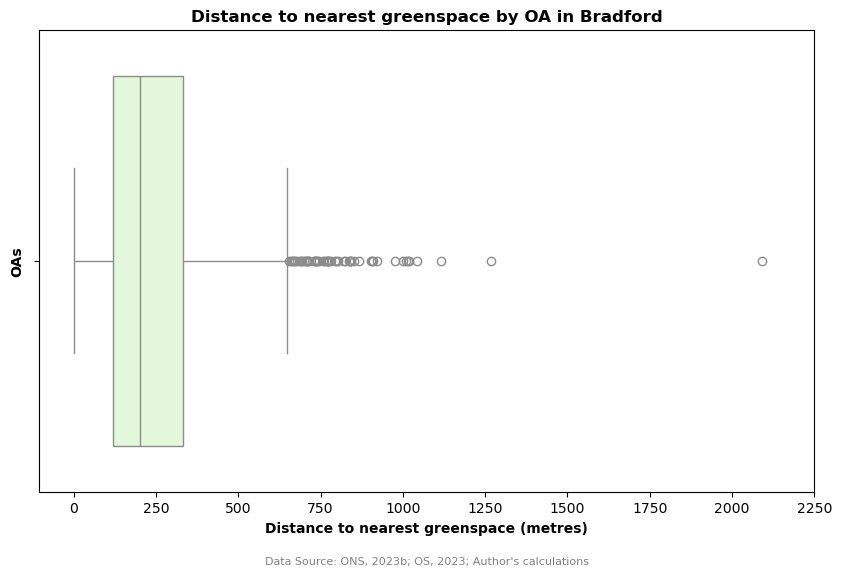

In [22]:
# Setup figure and boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(unique_nearest_greenspace, x='Distance', color='#e1fdd5')     # Add data and change colour

# Add title and amend axes
plt.title('Distance to nearest greenspace by OA in Bradford',
          fontweight='bold', fontsize=12) # Change title to specified font settings
ax.set(xlabel="") # Set ax xlabel to nothing so the variable name does not appear
plt.xlabel("Distance to nearest greenspace (metres)", fontweight='bold') # set x-axis label and font
plt.ylabel("OAs", fontweight='bold') # set y-axis label and font

# Set the x-axis ticks at 250 increments
tick_locations = np.arange(0, 2251, 250)
ax.set_xticks(tick_locations)

# Add a footnote with the data source and specify location on visual
plt.text(0.5, -0.15, "Data Source: ONS, 2023b; OS, 2023; Author's calculations",
         ha="center", va="center", transform=plt.gca().transAxes,
         fontsize=8, color="gray")

plt.show()

In [23]:
# Get precise figures as shown in the boxplot
unique_nearest_greenspace.describe()

,Distance
count,1575.000000
mean,247.661399
std,183.485184
min,0.000000
25%,119.213902
50%,201.468622
75%,332.656088
max,2090.986345


<div style="color: #2F5496; text-decoration: underline; font-size: 18px; font-weight: bold;">
    Dependent and independent variables
</div>

Below are scatter plots and regression lines between the dependent and independent variables. There is one high distance outlier visible across all four dimensions, and all present a negative correlation with distance to nearest greenspace.

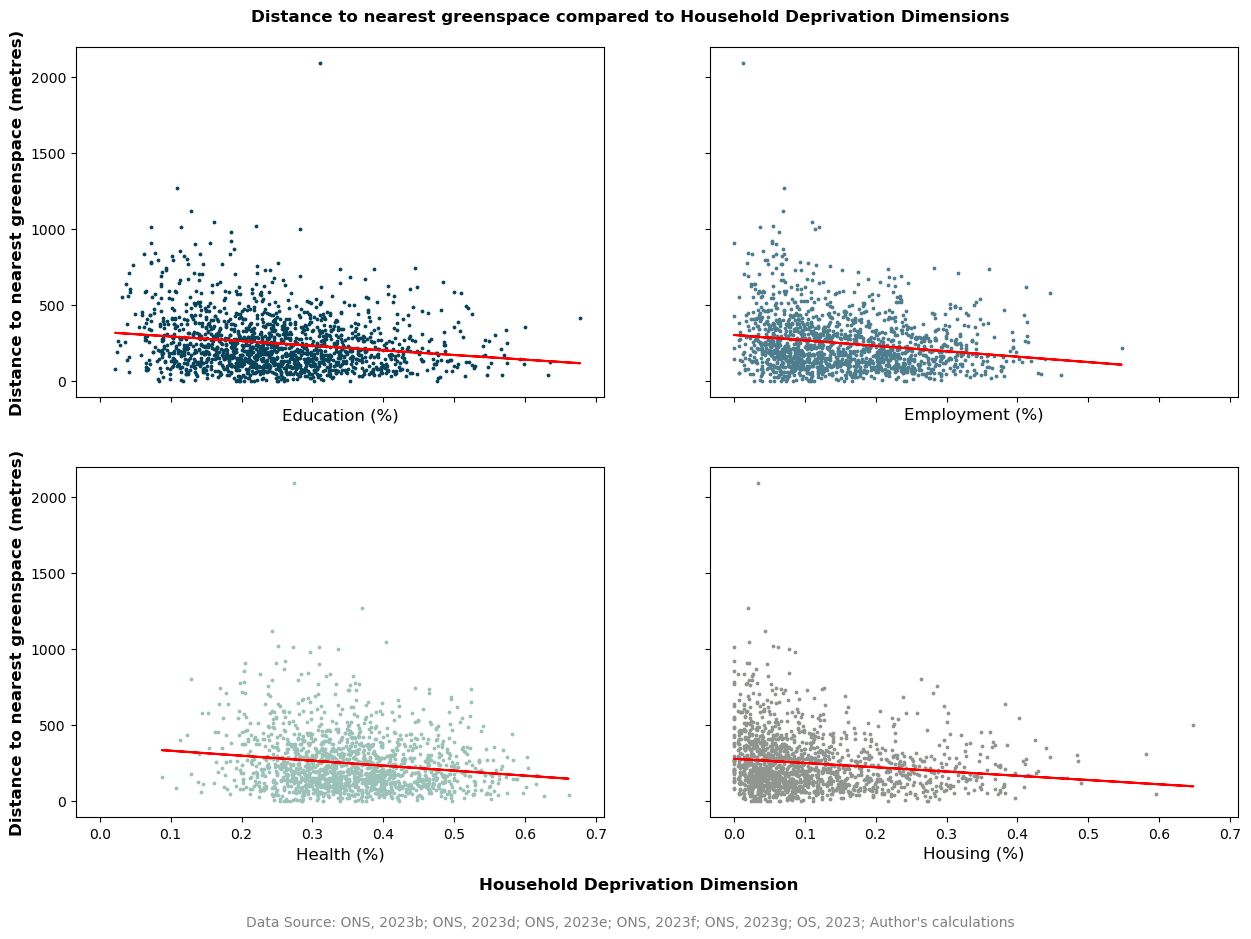

In [24]:
# Set up a figure with 2 rows and 2 columns for subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True, sharex=True) # Share axes across 4 plots for visual consistency

# Add title, x-axis subtitle, and y-axis labels
plt.title('Distance to nearest greenspace compared to Household Deprivation Dimensions', 
          x=-0.15, y=2.25, fontweight='bold', fontsize=12)
fig.suptitle('Household Deprivation Dimension', y=0.05, fontweight='bold', fontsize=12)
axs[0,0].set_ylabel('Distance to nearest greenspace (metres)', fontweight='bold', fontsize=12)
axs[1,0].set_ylabel('Distance to nearest greenspace (metres)', fontweight='bold', fontsize=12)


### Education scatter
axs[0,0].scatter(x=final_df['HHD_dep_education_PC'], y=final_df['Distance'], s=3, c='#09435a') # add data and set colour
axs[0,0].set_xlabel('Education (%)', fontsize=12) # add axis label and set font

# Calculate the regression line
slope0, intercept0 = np.polyfit(final_df['HHD_dep_education_PC'], final_df['Distance'], 1)
regression_line0 = np.polyval([slope0, intercept0], final_df['HHD_dep_education_PC'])

# Add this to the chart
axs[0,0].plot(final_df['HHD_dep_education_PC'], regression_line0, color='red')


### Employment scatter
axs[0,1].scatter(x=final_df['HHD_dep_employment_PC'], y=final_df['Distance'], s=3, c='#4e7d8e') # add data and set colour
axs[0,1].set_xlabel('Employment (%)', fontsize=12) # add axis label and set font

# Calculate the regression line
slope1, intercept1 = np.polyfit(final_df['HHD_dep_employment_PC'], final_df['Distance'], 1)
regression_line1 = np.polyval([slope1, intercept1], final_df['HHD_dep_employment_PC'])

# Add this to the chart
axs[0,1].plot(final_df['HHD_dep_employment_PC'], regression_line1, color='red')


### Health scatter
axs[1,0].scatter(x=final_df['HHD_dep_health_PC'], y=final_df['Distance'], s=3, c='#9cc2b8') # add data and set colour
axs[1,0].set_xlabel('Health (%)', fontsize=12) # add axis label and set font

# Calculate the regression line
slope2, intercept2 = np.polyfit(final_df['HHD_dep_health_PC'], final_df['Distance'], 1)
regression_line2 = np.polyval([slope2, intercept2], final_df['HHD_dep_health_PC'])

# Add this to the chart
axs[1,0].plot(final_df['HHD_dep_health_PC'], regression_line2, color='red')


### Housing scatter
axs[1,1].scatter(x=final_df['HHD_dep_housing_PC'], y=final_df['Distance'], s=3, c='#90958f') # add data and set colour
axs[1,1].set_xlabel('Housing (%)', fontsize=12) # add axis label and set font

# Calculate the regression line
slope3, intercept3 = np.polyfit(final_df['HHD_dep_housing_PC'], final_df['Distance'], 1)
regression_line3 = np.polyval([slope3, intercept3], final_df['HHD_dep_housing_PC'])

# Add this to the chart
axs[1,1].plot(final_df['HHD_dep_housing_PC'], regression_line3, color='red')


# Add a footnote with the data source and specify location on visual
plt.text(-0.15, -0.3,
         "Data Source: ONS, 2023b; ONS, 2023d; ONS, 2023e; ONS, 2023f; ONS, 2023g; OS, 2023; Author's calculations",
         ha="center", va="center", transform=plt.gca().transAxes,
         fontsize=10, color="gray")


plt.show()